In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import collections

In [2]:
bike_data = pd.read_csv("Bike Rental UCI dataset.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
seasons = bike_data['season']
print(np.unique(seasons))

[1 2 3 4]


In [4]:
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

In [5]:
def cvtSeason(num):
    if(num==1):
        return "spring"
    if(num==2):
        return "summer"
    if(num==3):
        return "fall"
    if(num==4):
        return "winter"
bike_data_2011 = bike_data[bike_data['dteday']<'2011-12-30']
bike_data_2012 = bike_data[bike_data['dteday']>'2011-12-31']
bike_data_2011['season'] = bike_data_2011['season'].apply(cvtSeason)
bike_data_2012['season'] = bike_data_2012['season'].apply(cvtSeason)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
F:\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [6]:
#total number of bicycle rented in 2011
winter_sea = bike_data_2011[bike_data_2011['season']=='winter']
summer_sea = bike_data_2011[bike_data_2011['season']=='summer']
spring_sea = bike_data_2011[bike_data_2011['season']=='spring']
fall_sea = bike_data_2011[bike_data_2011['season']=='fall']


In [7]:
def plot_bar(bike_data_2011,tle):
    seson = ['spring','summer','spring','fall']
    season_by_booking_sum  = np.array([])
    for v in seson:
        sm = np.sum(bike_data_2011['cnt'][bike_data_2011['season']==v].values)
        season_by_booking_sum = np.append(season_by_booking_sum,sm)
    ttl = np.sum(bike_data_2011['cnt'].values)
    plt.bar(seson,season_by_booking_sum)
    plt.title(tle)



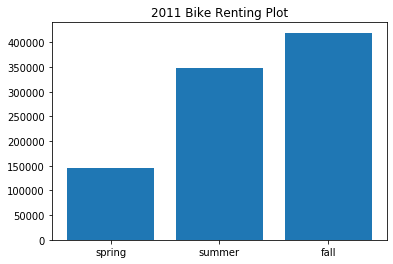

In [8]:
plot_bar(bike_data_2011,"2011 Bike Renting Plot")

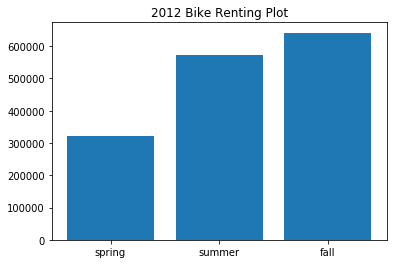

In [9]:
plot_bar(bike_data_2012,"2012 Bike Renting Plot")

In [10]:
def yearly_analysis(bike_data_2011,yearly):
    plt.figure(figsize=(15,3))
    plt.plot(bike_data_2011['dteday'],bike_data_2011['cnt'])
    plt.xlabel("Month")
    plt.ylabel("Number of Bike Rented")
    plt.title(yearly)

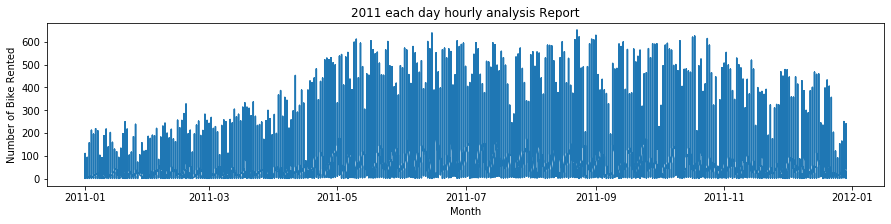

In [11]:
yearly_analysis(bike_data_2011,"2011 each day hourly analysis Report")

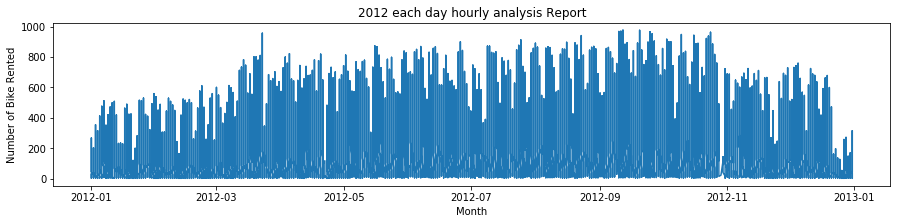

In [12]:
yearly_analysis(bike_data_2012,"2012 each day hourly analysis Report")

In [13]:
#T testing to know the output to know the changing in bike usage 
#lets analysis and design dataset for monthly analysis
#day by day analysis
def prepare_graph(bike_data_2011,ttl):
    bikes_date = np.unique(bike_data_2011['dteday'])
    bikes_month_usage_count  = np.array([])
    for dt in bikes_date:
        sm = np.sum(bike_data_2011['cnt'][bike_data_2011['dteday']==dt])
        bikes_month_usage_count = np.append(bikes_month_usage_count,sm)
    plt.figure(figsize=(15,3))
    plt.plot(bikes_date,bikes_month_usage_count)
    plt.ylabel("Bike Rented")
    plt.xlabel("Month")
    plt.title(ttl)

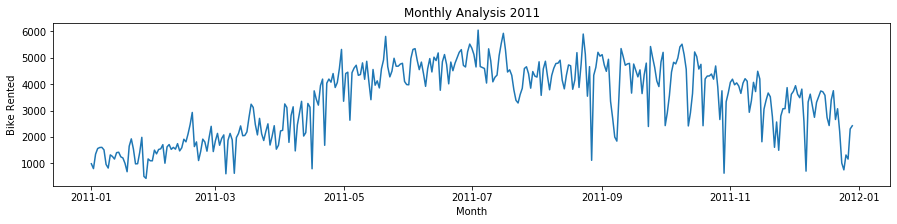

In [14]:
prepare_graph(bike_data_2011,"Monthly Analysis 2011")

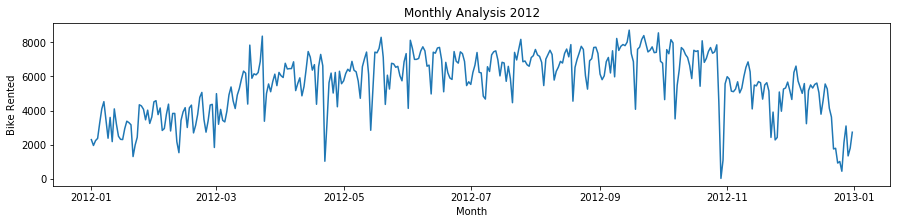

In [15]:
prepare_graph(bike_data_2012,"Monthly Analysis 2012")

In [16]:
#analysis of holiday
def analysis_holiday(bike_data_2011,ttl):
    holidays_2011 = bike_data_2011['holiday']
    holiday_list=[0,1]
    sm_lst=[]
    for v in holiday_list:
        sm = np.sum(bike_data_2011['cnt'][bike_data_2011['holiday']==v].values)
        sm_lst.append(sm)

    plt.figure(figsize=(6,3))
    plt.bar(["holiday","Not Holiday"],sm_lst)
    plt.ylabel("Bike Rented")
    plt.xlabel("Month")
    plt.title(ttl)


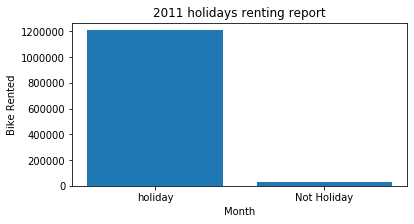

In [17]:
analysis_holiday(bike_data_2011,"2011 holidays renting report")

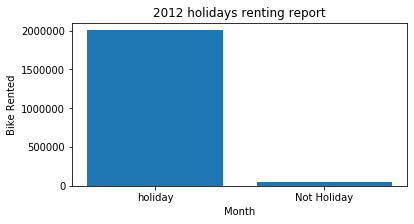

In [18]:
analysis_holiday(bike_data_2012,"2012 holidays renting report")